In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import optuna
import mlflow
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



In [288]:
data = pd.read_csv('data/indian_liver_patientmissing.csv')
data.rename(columns={'LiverPateientOrNot 1meansNO': 'Liver_Patient'}, inplace=True)
categorical_cols =[]
continuous_cols =[]

In [289]:
print(data.head(5))

   Age  Gender Total_Bilirubin Direct_Bilirubin Alkaline_Phosphotase  \
0   65  Female             0.7              0.1                  187   
1   62    Male            10.9              5.5                  699   
2   62    Male             7.3              4.1                  490   
3   58    Male               1              0.4                  182   
4   72    Male             3.9                2                  195   

  Alamine_Aminotransferase Aspartate_Aminotransferase Total_Protiens  Albumin  \
0                       16                         18            6.8      3.3   
1                       64                        100            7.5      3.2   
2                       60                         68              7      3.3   
3                       14                         20            6.8      3.4   
4                       27                         59            7.3      2.4   

   Albumin_and_Globulin_Ratio  Liver_Patient  
0                        0.90    

In [290]:
for col in data.columns:
    print(len(data[col].unique()),col)
    if len(data[col].unique()) < 10:
        categorical_cols.append(col)
        print(data[col].unique())
    else:
        continuous_cols.append(col)
    print()

72 Age

2 Gender
['Female' 'Male']

114 Total_Bilirubin

81 Direct_Bilirubin

264 Alkaline_Phosphotase

152 Alamine_Aminotransferase

177 Aspartate_Aminotransferase

59 Total_Protiens

40 Albumin

70 Albumin_and_Globulin_Ratio

2 Liver_Patient
[1 2]



In [291]:

print("Continuous Columns:", continuous_cols)
print("Categorical Columns:", categorical_cols)


Continuous Columns: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Categorical Columns: ['Gender', 'Liver_Patient']


#### Converting Gender to Binary data from Female - 0 and Male - 1

In [ ]:

if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
    
print(data['Gender'].unique())

[0 1]


In [293]:
columns_with_spaces = [col for col in data.columns if ' ' in col]
if columns_with_spaces:
    print(f"Columns with spaces: {columns_with_spaces}")

In [294]:
data.replace(' ', np.nan, inplace=True)
for col in data.columns:
    print(col, data[col].isnull().sum())
    if data[col].isnull().sum() != 0:
        imputer = SimpleImputer(strategy='mean')
        data[col] = imputer.fit_transform(data[[col]])
        print(f"{col} has been imputed, Remaining null values - {data[col].isnull().sum()}")
    else:
        pass
    print()

Age 0

Gender 0

Total_Bilirubin 3
Total_Bilirubin has been imputed, Remaining null values - 0

Direct_Bilirubin 4
Direct_Bilirubin has been imputed, Remaining null values - 0

Alkaline_Phosphotase 1
Alkaline_Phosphotase has been imputed, Remaining null values - 0

Alamine_Aminotransferase 3
Alamine_Aminotransferase has been imputed, Remaining null values - 0

Aspartate_Aminotransferase 3
Aspartate_Aminotransferase has been imputed, Remaining null values - 0

Total_Protiens 2
Total_Protiens has been imputed, Remaining null values - 0

Albumin 0

Albumin_and_Globulin_Ratio 4
Albumin_and_Globulin_Ratio has been imputed, Remaining null values - 0

Liver_Patient 0



#### Visualize the correlation matrix

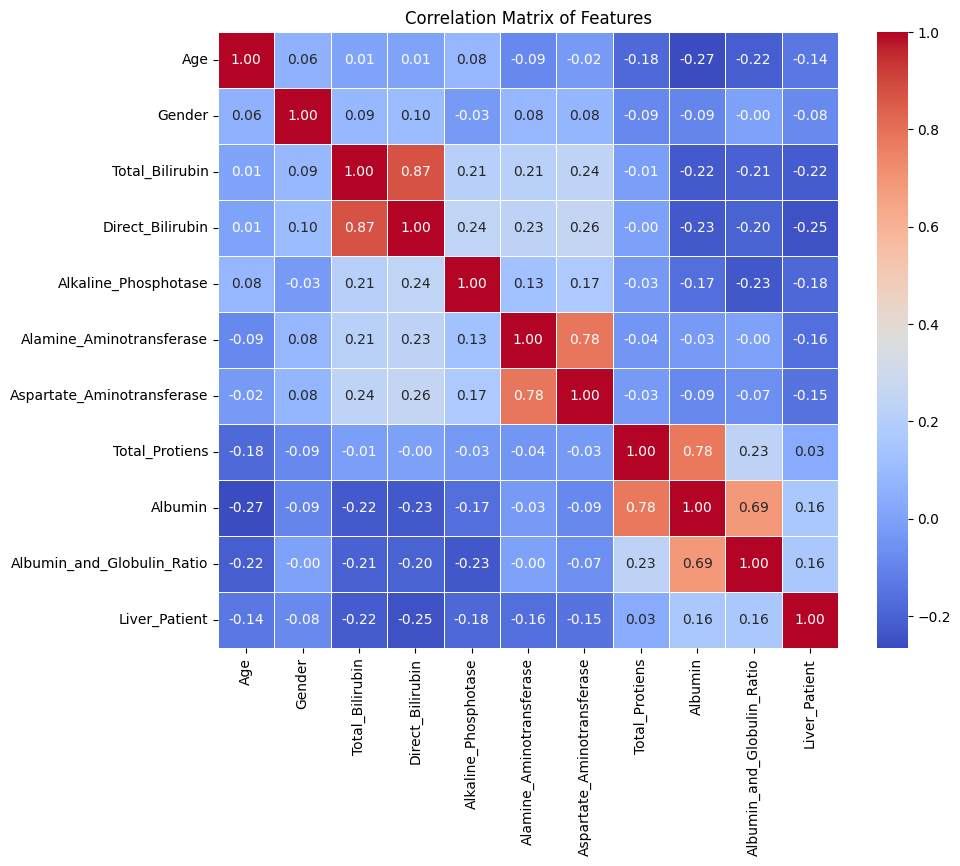

[('Total_Bilirubin', 'Direct_Bilirubin'),
 ('Direct_Bilirubin', 'Total_Bilirubin')]

In [347]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Find highly correlated features (absolute correlation > 0.8)
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]

high_corr_pairs

In [296]:
# Pairwise correlation for feature selection
correlation_matrix = data.corr()
print("Pairwise Correlation Matrix:")
print(correlation_matrix)

Pairwise Correlation Matrix:
                                 Age    Gender  Total_Bilirubin  \
Age                         1.000000  0.056560         0.009429   
Gender                      0.056560  1.000000         0.088078   
Total_Bilirubin             0.009429  0.088078         1.000000   
Direct_Bilirubin            0.005871  0.100762         0.873330   
Alkaline_Phosphotase        0.080538 -0.027462         0.205442   
Alamine_Aminotransferase   -0.087203  0.081393         0.213265   
Aspartate_Aminotransferase -0.023767  0.077748         0.236509   
Total_Protiens             -0.177874 -0.086323        -0.010337   
Albumin                    -0.265924 -0.093799        -0.221874   
Albumin_and_Globulin_Ratio -0.216089 -0.003404        -0.205840   
Liver_Patient              -0.137351 -0.082416        -0.220714   

                            Direct_Bilirubin  Alkaline_Phosphotase  \
Age                                 0.005871              0.080538   
Gender                    

#### Distribution plots for continuous features

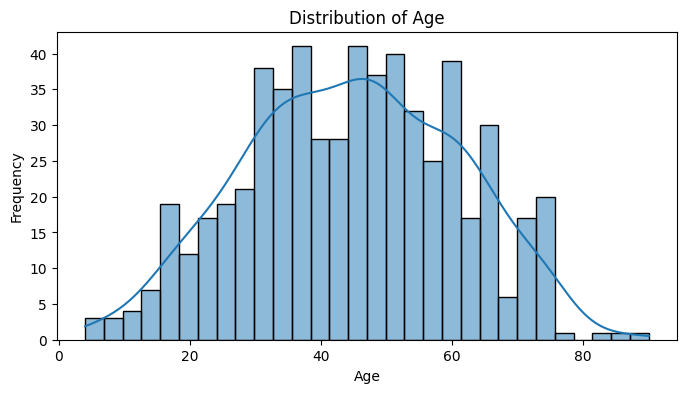

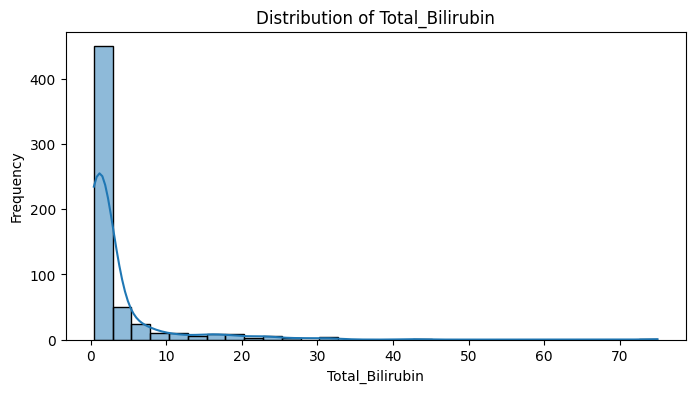

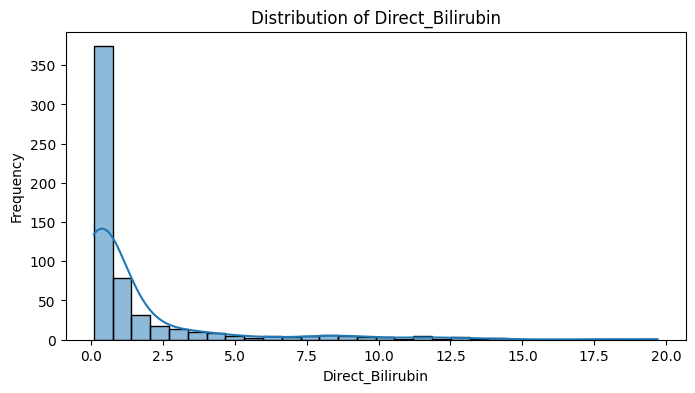

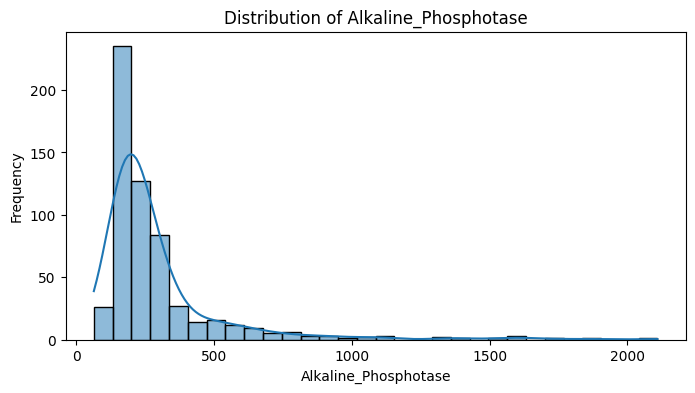

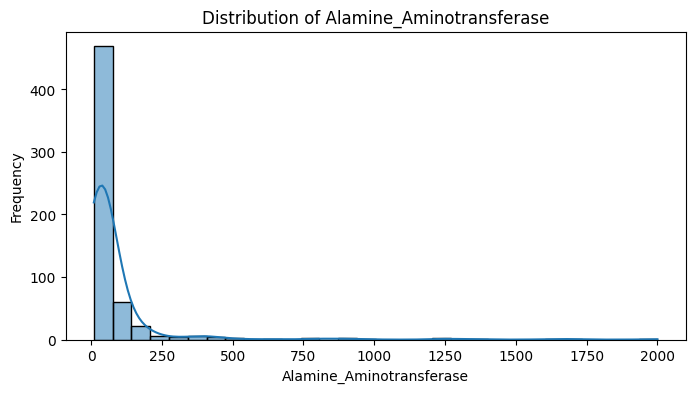

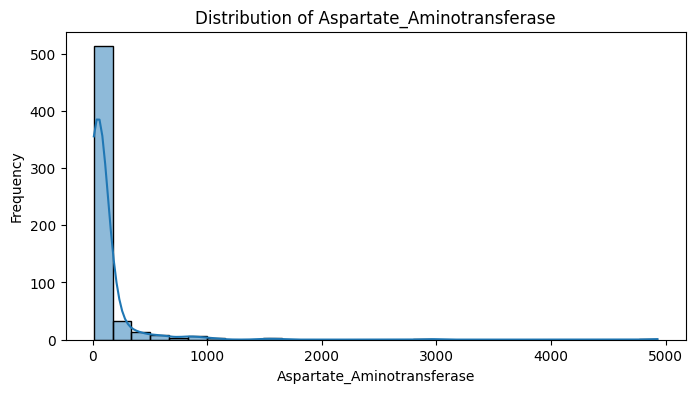

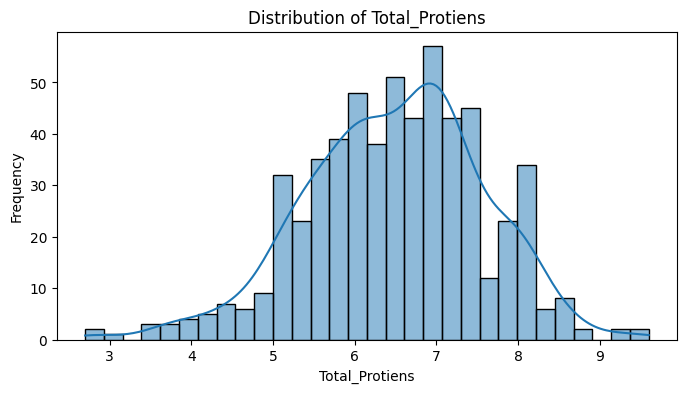

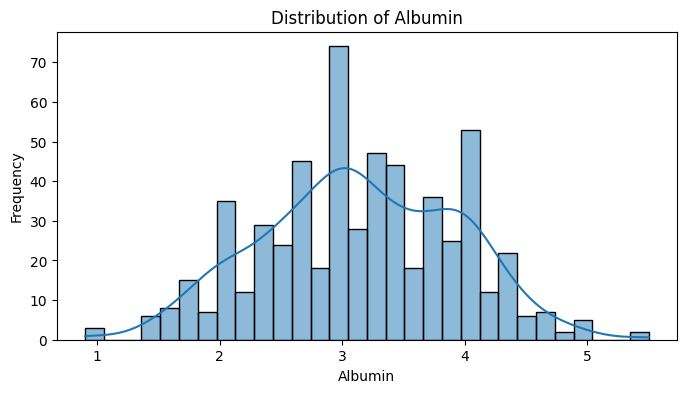

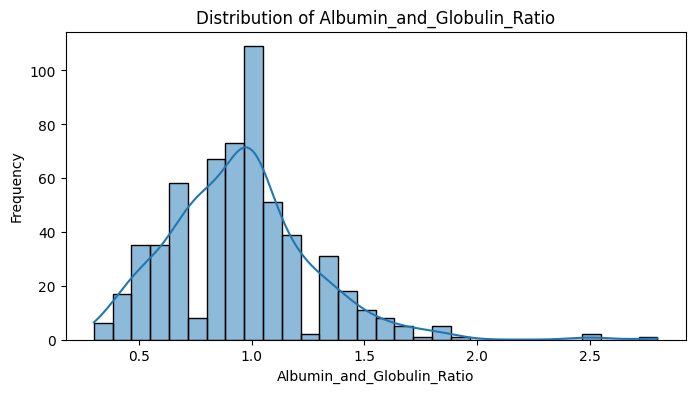

In [297]:

# Distribution plots for continuous features
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Count plots for categorical features

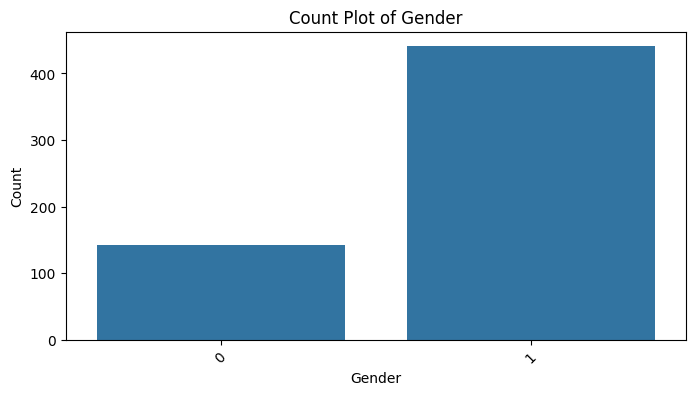

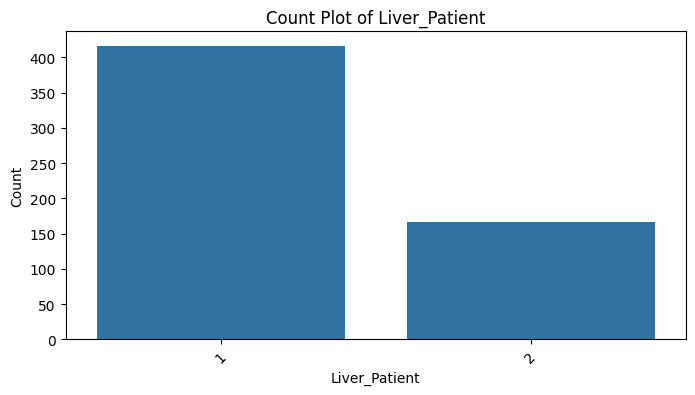

In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#### Boxplots to check for outliers in continuous features

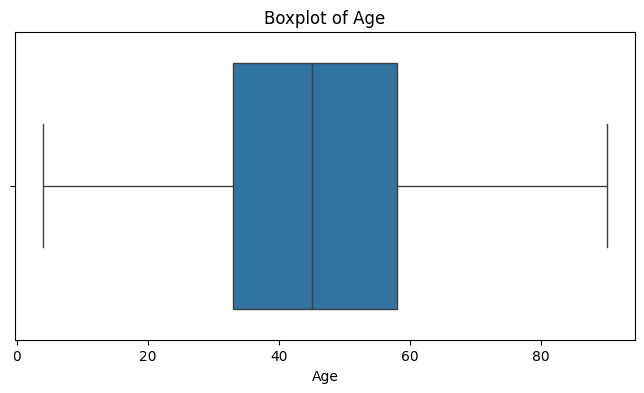

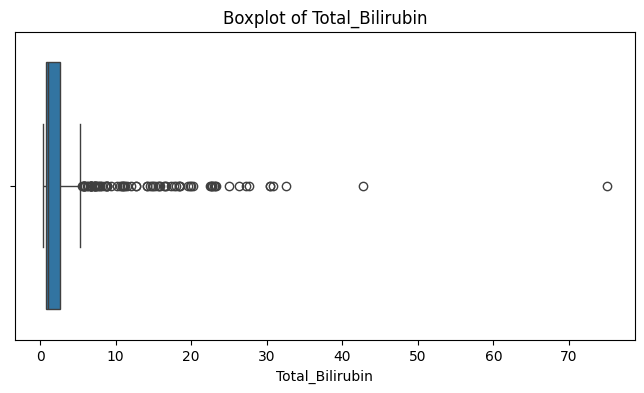

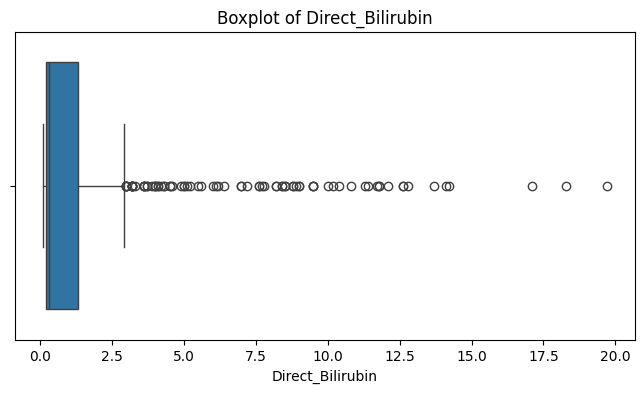

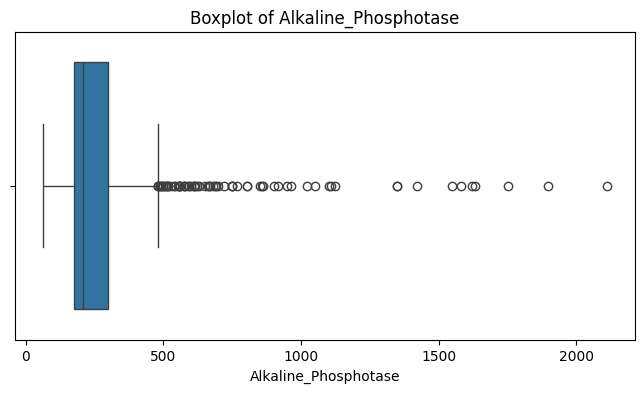

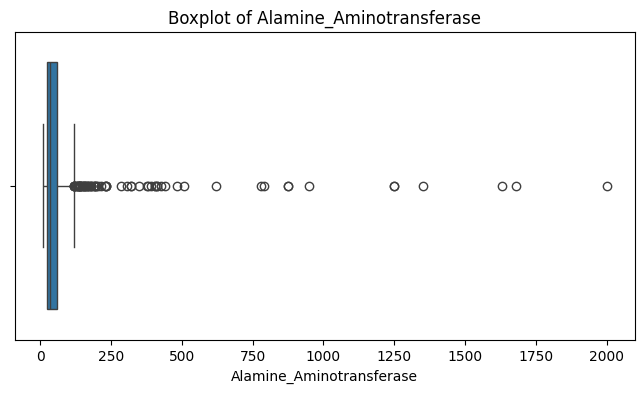

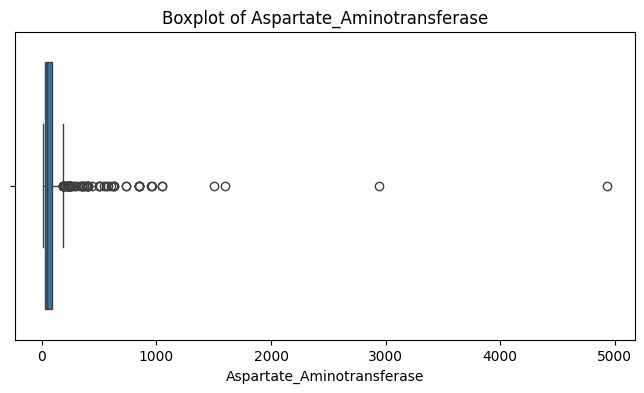

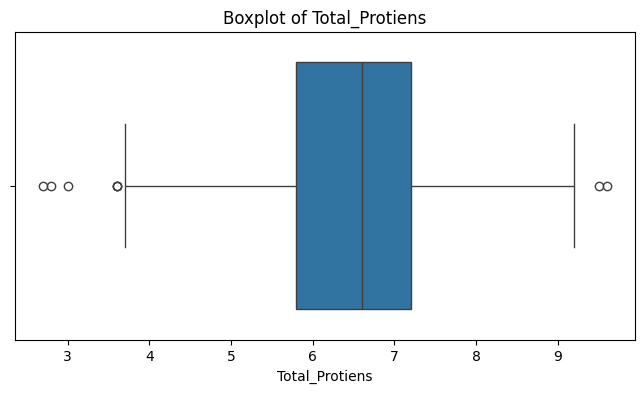

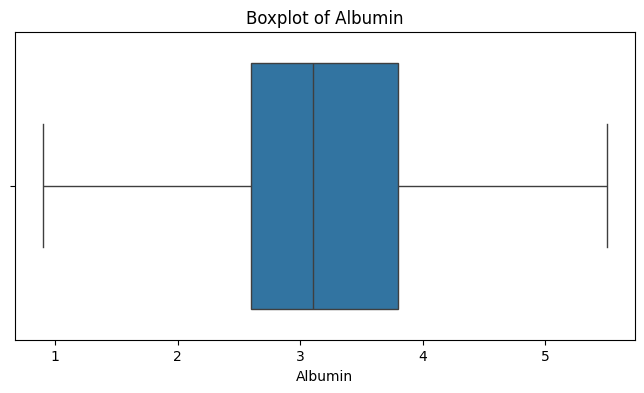

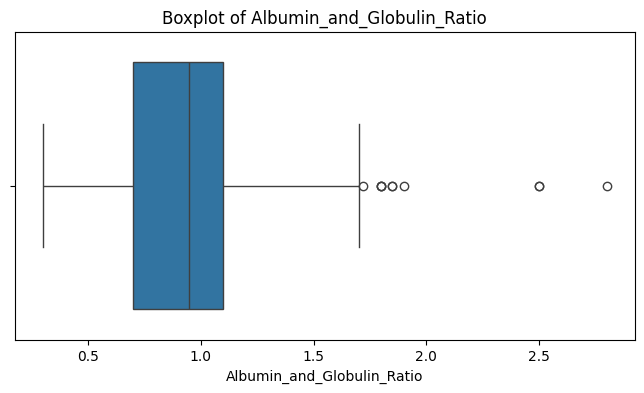

In [299]:
# Boxplots to check for outliers in continuous features
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### Pairplot for visualizing pairwise relationships between features

<Figure size 1200x800 with 0 Axes>

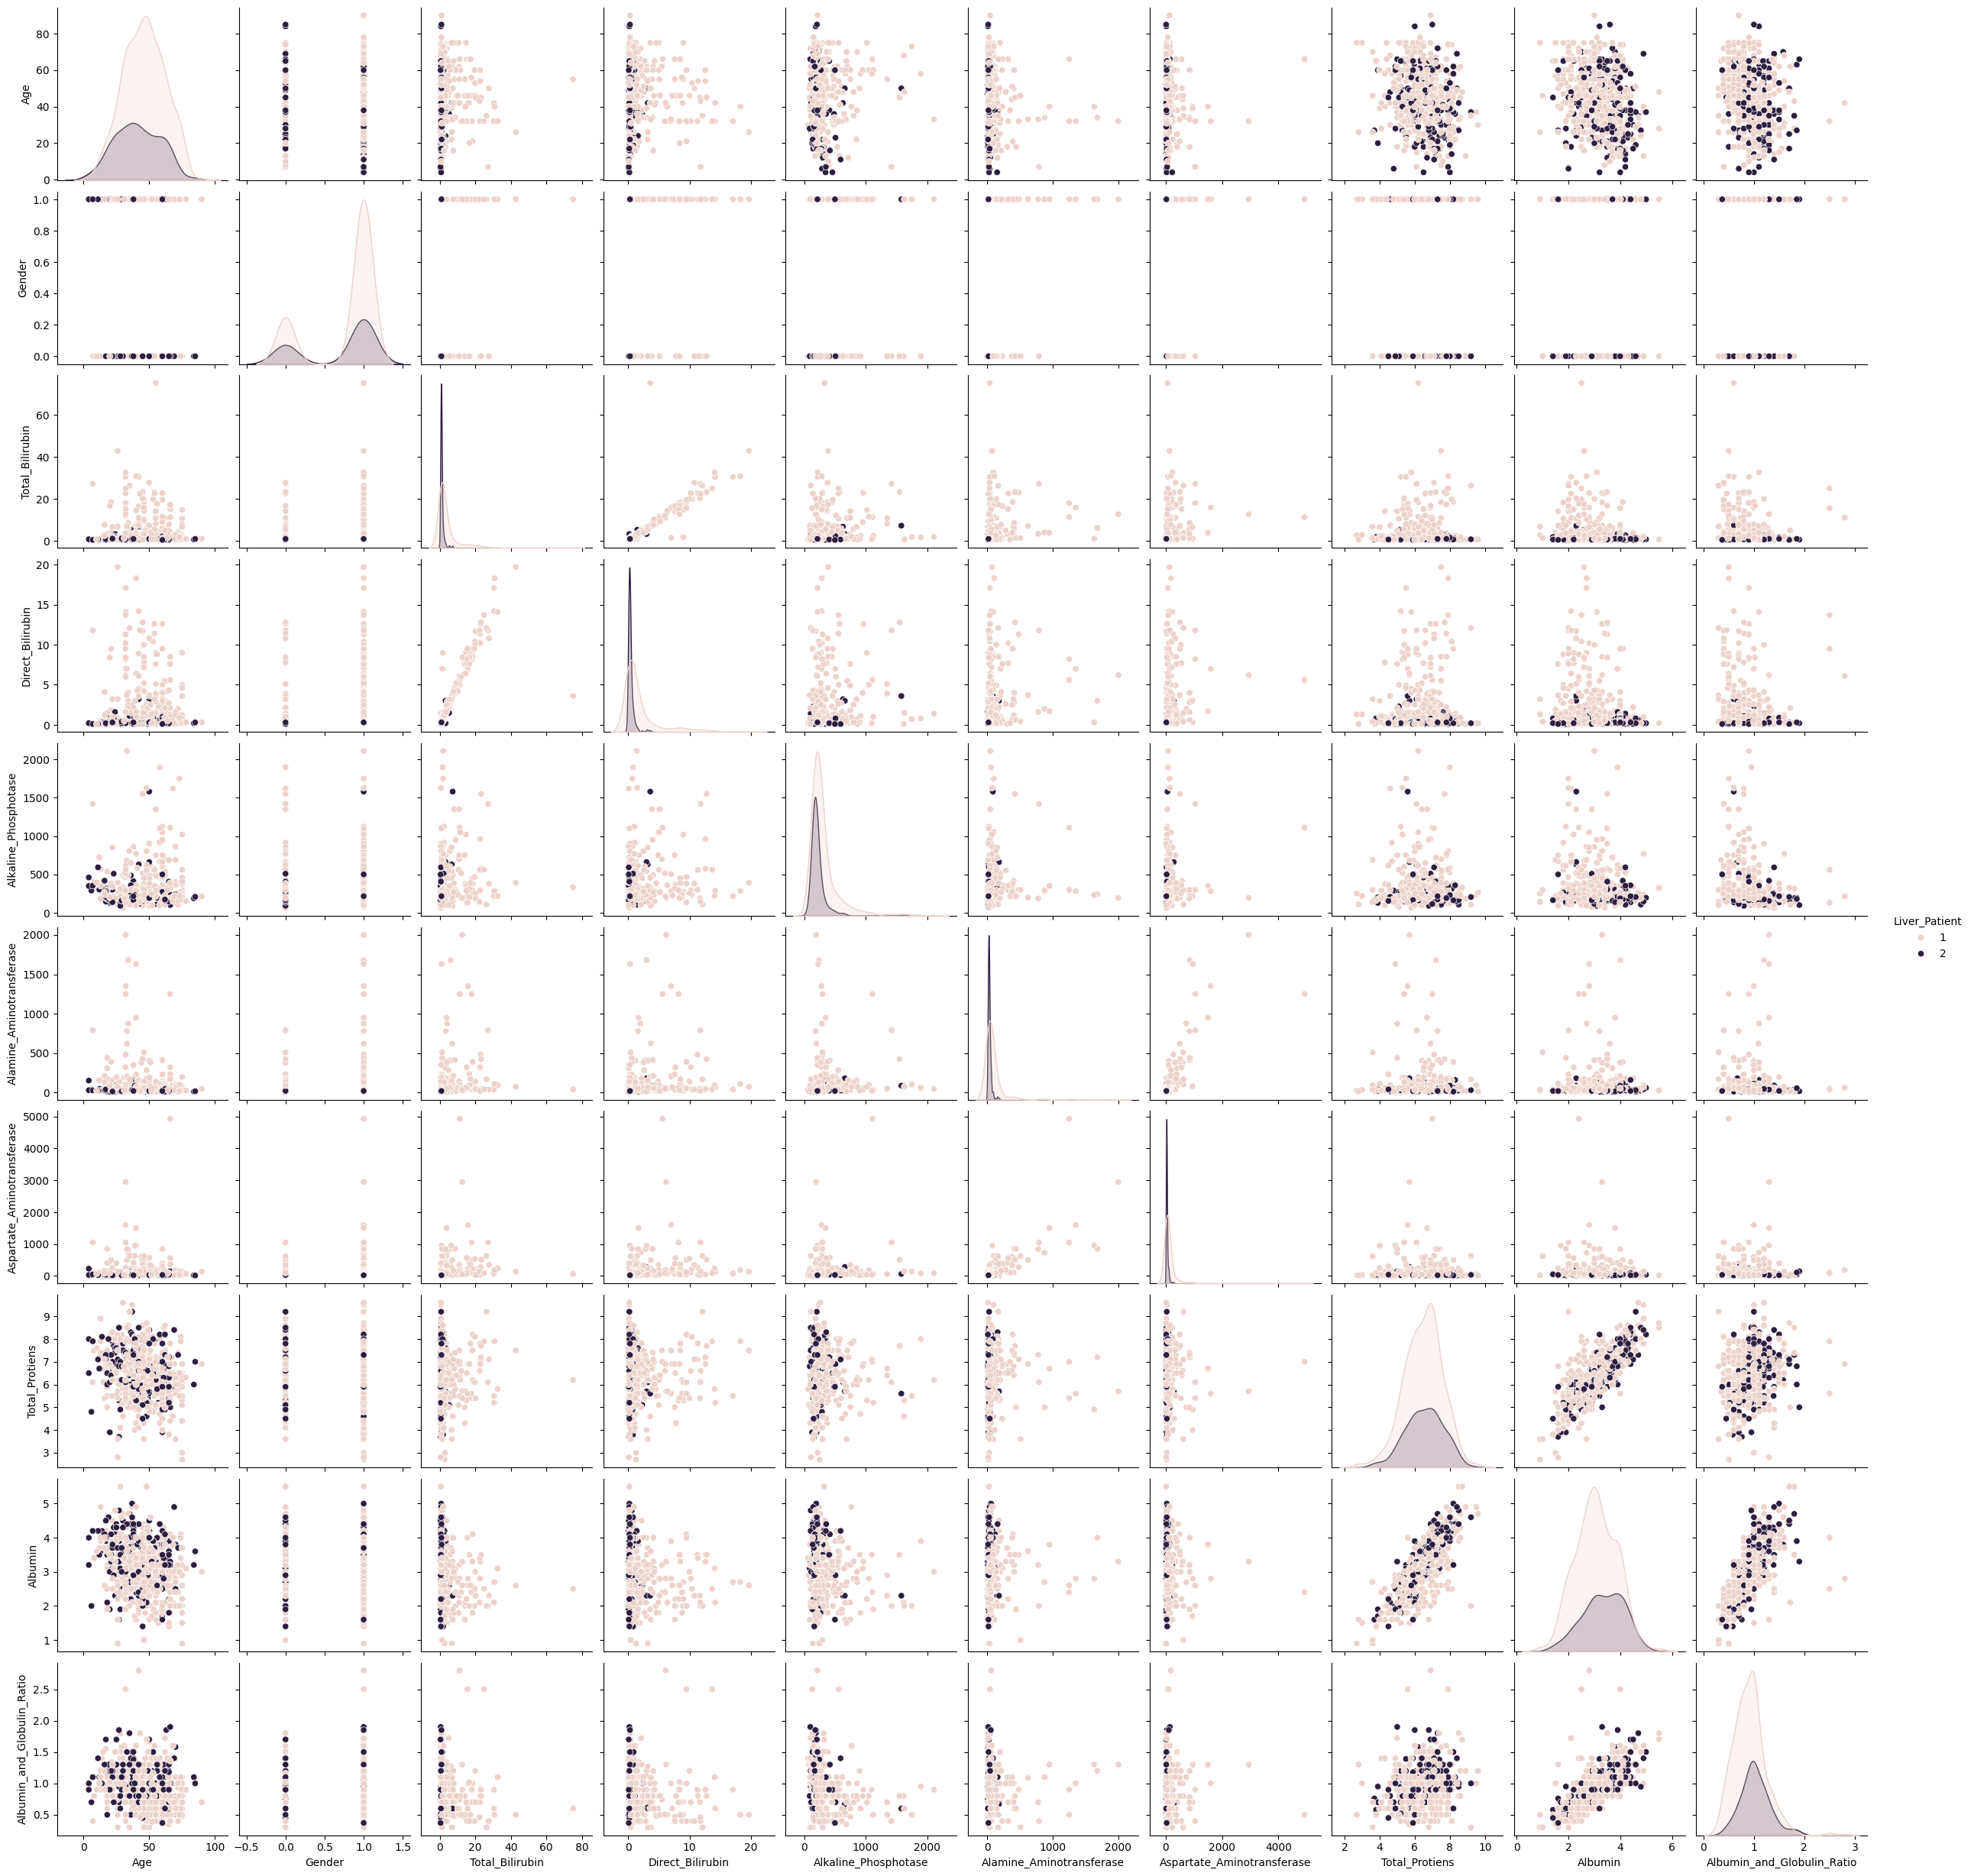

In [ ]:

plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Liver_Patient', diag_kind='kde')
plt.show()


#### Bar plot for average values grouped by the target variable

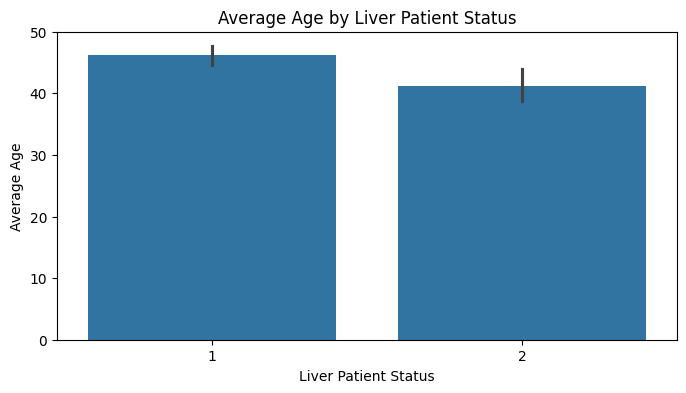

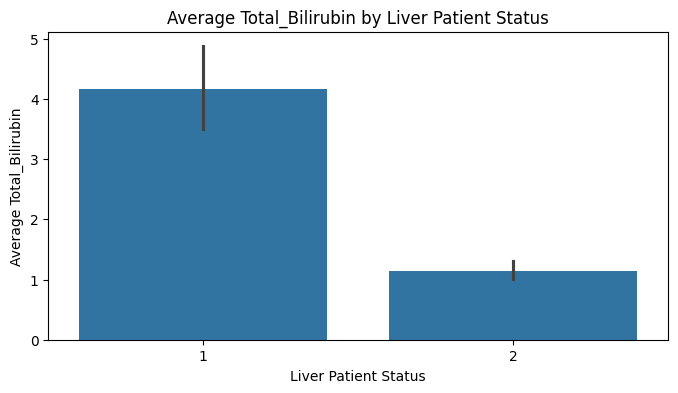

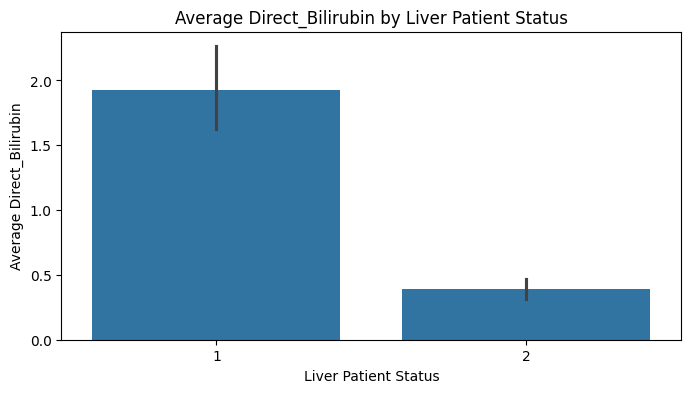

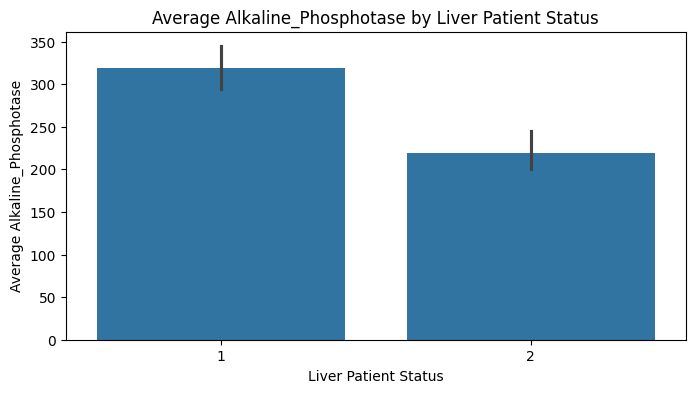

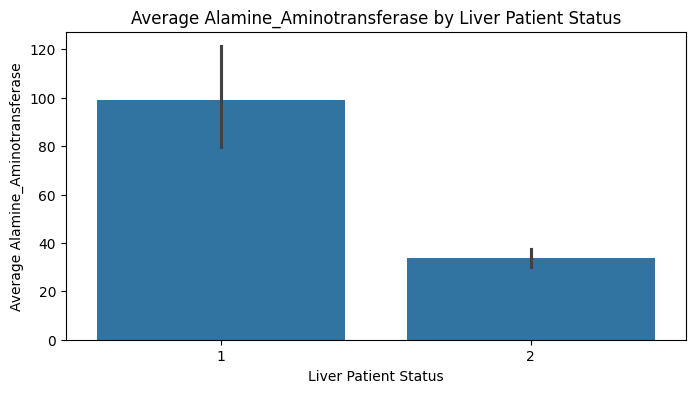

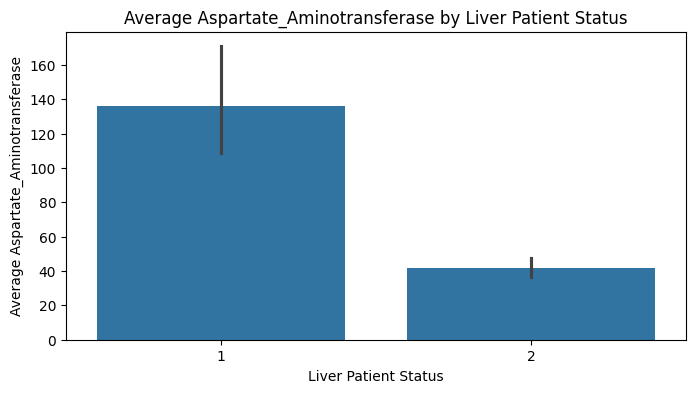

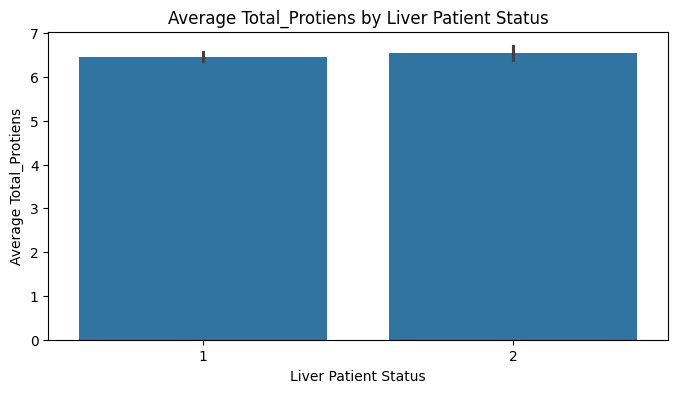

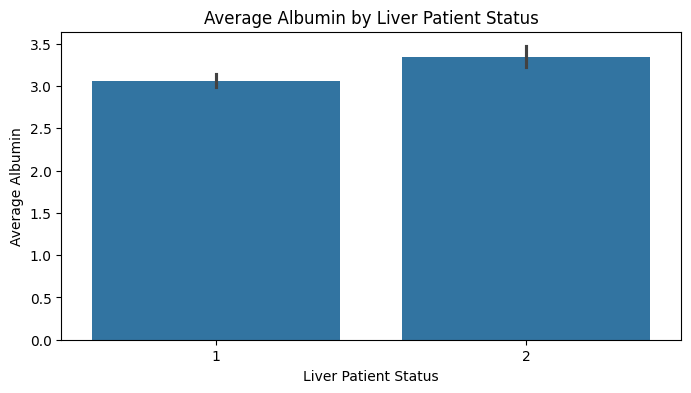

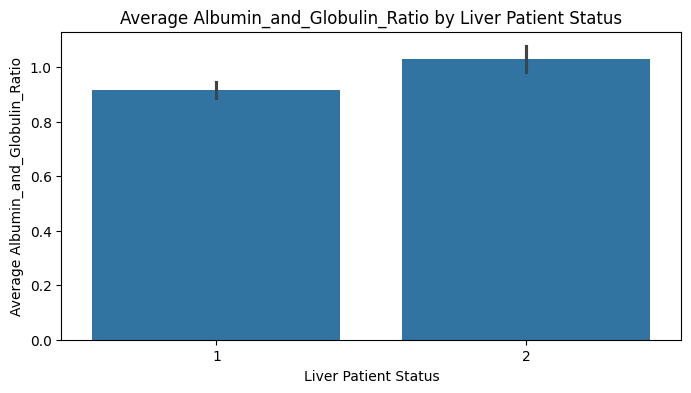

In [ ]:

for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Liver_Patient', y=col, data=data)
    plt.title(f'Average {col} by Liver Patient Status')
    plt.xlabel('Liver Patient Status')
    plt.ylabel(f'Average {col}')
    plt.show()


In [ ]:

X = data.drop(columns=['Liver_Patient', 'Direct_Bilirubin', 'Gender'])
y = data['Liver_Patient']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

mutual_info_scores = mutual_info_classif(X_scaled, y)

chi2_scores, chi2_pvalues = chi2(X_scaled, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mutual_info_scores,
    'Chi-Square': chi2_scores,
    'Chi-Square_pval': chi2_pvalues
})

print(feature_scores)


                      Feature  Mutual_Information  Chi-Square  Chi-Square_pval
0                         Age            0.051220    0.821266         0.364810
1             Total_Bilirubin            0.062211    5.042712         0.024730
2        Alkaline_Phosphotase            0.024531    2.520773         0.112355
3    Alamine_Aminotransferase            0.087022    3.649466         0.056087
4  Aspartate_Aminotransferase            0.057691    2.181901         0.139642
5              Total_Protiens            0.000000    0.025894         0.872159
6                     Albumin            0.025179    0.930252         0.334797
7  Albumin_and_Globulin_Ratio            0.037994    0.961551         0.326797


In [ ]:

model = RandomForestClassifier(random_state=42, n_estimators=100)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)
feature_scores['RFE_Rank'] = rfe.ranking_
feature_scores.sort_values(by='RFE_Rank')

,Feature,Mutual_Information,Chi-Square,Chi-Square_pval,RFE_Rank
0,Age,0.051220,0.821266,0.364810,1
1,Total_Bilirubin,0.062211,5.042712,0.024730,1
2,Alkaline_Phosphotase,0.024531,2.520773,0.112355,1
3,Alamine_Aminotransferase,0.087022,3.649466,0.056087,1
4,Aspartate_Aminotransferase,0.057691,2.181901,0.139642,1
6,Albumin,0.025179,0.930252,0.334797,2
5,Total_Protiens,0.000000,0.025894,0.872159,3
7,Albumin_and_Globulin_Ratio,0.037994,0.961551,0.326797,4


#### Optuna objective function for Decision Tree tuning

In [ ]:

def objective_decision_tree(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_decision_tree, n_trials=50)
best_params_dt = study_dt.best_params
best_params_dt

[I 2024-12-02 14:02:41,248] A new study created in memory with name: no-name-ee31368f-5b5d-4b47-910c-7af4b2a412fb
[I 2024-12-02 14:02:41,262] Trial 0 finished with value: 0.6466254052460949 and parameters: {'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6466254052460949.
[I 2024-12-02 14:02:41,272] Trial 1 finished with value: 0.674049513704686 and parameters: {'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.674049513704686.
[I 2024-12-02 14:02:41,290] Trial 2 finished with value: 0.6689360447981137 and parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.674049513704686.
[I 2024-12-02 14:02:41,302] Trial 3 finished with value: 0.6706454465075155 and parameters: {'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.674049513704686.
[I 2024-12-02 14:02:41,311] Trial 4 finished with value: 0.6654

{'max_depth': 19, 'min_samples_split': 18, 'min_samples_leaf': 6}

From preivous trail I have choose 5 because it gave the lowest variance

    - Principal Component 1: 30.58%
    - Principal Component 2: 22.44%
    - Principal Component 3: 15.13%
    - Principal Component 4: 10.66%
    - Principal Component 5: 9.36%

#### Optuna Training and PCA Implementation

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train models WITHOUT feature engineering
decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train and evaluate Decision Tree without feature engineering
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Train and evaluate Random Forest without feature engineering
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Calculate metrics for both models
metrics_without_fe = {
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1-Score": f1_score(y_test, y_pred_dt),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf),
    },
}

# Step 2: Apply PCA (with all features normalized)
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate Decision Tree with PCA
decision_tree.fit(X_train_pca, y_train)
y_pred_dt_pca = decision_tree.predict(X_test_pca)

# Train and evaluate Random Forest with PCA
random_forest.fit(X_train_pca, y_train)
y_pred_rf_pca = random_forest.predict(X_test_pca)

# Calculate metrics for both models with PCA
metrics_with_fe = {
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt_pca),
        "Precision": precision_score(y_test, y_pred_dt_pca),
        "Recall": recall_score(y_test, y_pred_dt_pca),
        "F1-Score": f1_score(y_test, y_pred_dt_pca),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf_pca),
        "Precision": precision_score(y_test, y_pred_rf_pca),
        "Recall": recall_score(y_test, y_pred_rf_pca),
        "F1-Score": f1_score(y_test, y_pred_rf_pca),
    },
}

# Combine results for comparison
comparison_metrics = {
    "Without Feature Engineering": metrics_without_fe,
    "With Feature Engineering (PCA)": metrics_with_fe,
}

comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy (Without FE)": [metrics_without_fe["Decision Tree"]["Accuracy"], metrics_without_fe["Random Forest"]["Accuracy"]],
    "Precision (Without FE)": [metrics_without_fe["Decision Tree"]["Precision"], metrics_without_fe["Random Forest"]["Precision"]],
    "Recall (Without FE)": [metrics_without_fe["Decision Tree"]["Recall"], metrics_without_fe["Random Forest"]["Recall"]],
    "F1-Score (Without FE)": [metrics_without_fe["Decision Tree"]["F1-Score"], metrics_without_fe["Random Forest"]["F1-Score"]],
    "Accuracy (With PCA)": [metrics_with_fe["Decision Tree"]["Accuracy"], metrics_with_fe["Random Forest"]["Accuracy"]],
    "Precision (With PCA)": [metrics_with_fe["Decision Tree"]["Precision"], metrics_with_fe["Random Forest"]["Precision"]],
    "Recall (With PCA)": [metrics_with_fe["Decision Tree"]["Recall"], metrics_with_fe["Random Forest"]["Recall"]],
    "F1-Score (With PCA)": [metrics_with_fe["Decision Tree"]["F1-Score"], metrics_with_fe["Random Forest"]["F1-Score"]],
})
comparison_df

,Model,Accuracy (Without FE),Precision (Without FE),Recall (Without FE),F1-Score (Without FE),Accuracy (With PCA),Precision (With PCA),Recall (With PCA),F1-Score (With PCA)
0,Decision Tree,0.666667,0.807692,0.724138,0.763636,0.743590,0.835294,0.816092,0.825581
1,Random Forest,0.735043,0.804348,0.850575,0.826816,0.769231,0.819149,0.885057,0.850829


#### MLFLOW Runs

In [306]:
# Set the experiment name
mlflow.set_experiment("DecisionTree_and_RandomForest_Comparison")

<Experiment: artifact_location='file:///c:/Users/GOD/Desktop/IIT/IITJ/ML_Ops-2/mlruns/610439896056337969', creation_time=1733126715153, experiment_id='610439896056337969', last_update_time=1733126715153, lifecycle_stage='active', name='DecisionTree_and_RandomForest_Comparison', tags={}>

In [341]:
def train_and_log_model(model, model_name, X_train, X_test, y_train, y_test, params):
    with mlflow.start_run(run_name=model_name):
        # Log hyperparameters
        mlflow.log_params(params)
        # Converting to float to avoid user warning even though I have made sure there is no null values. Still getting user warning
        X_train = X_train.astype('float64')
        X_test = X_test.astype('float64')
        y_train = y_train.astype('float64')
        y_test = y_test.astype('float64')
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and calculate metrics
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metrics({
            "ML_Accuracy": accuracy,
            "ML_Precision": precision,
            "ML_Recall": recall,
            "ML_F1_score": f1,
        })
        
        # Create an example input
        input_example = X_test[:5]  # Use a small subset of the test set as an example
        
        # Log the model with the input example
        mlflow.sklearn.log_model(model, model_name, input_example=input_example)
        
        # Return metrics for display
        return {
            "ML_Accuracy": accuracy,
            "ML_Precision": precision,
            "ML_Recall": recall,
            "ML_F1_score": f1,
        }


In [342]:
# Prepare parameters for both models
decision_tree_params = best_params_dt  
random_forest_params = {"n_estimators": 100, "max_depth": 10, "random_state": 42}  # Example params
# Initialize models
decision_tree_model = DecisionTreeClassifier(**decision_tree_params)
random_forest_model = RandomForestClassifier(**random_forest_params)
# Train and log models
dt_metrics = train_and_log_model(decision_tree_model, "Decision Tree", X_train, X_test, y_train, y_test, decision_tree_params)
rf_metrics = train_and_log_model(random_forest_model, "Random Forest", X_train, X_test, y_train, y_test, random_forest_params)
# Display the metrics
metrics_summary = pd.DataFrame([dt_metrics, rf_metrics], index=["Decision Tree", "Random Forest"])
metrics_summary

,ML_Accuracy,ML_Precision,ML_Recall,ML_F1_score
Decision Tree,0.666667,0.807692,0.724138,0.763636
Random Forest,0.743590,0.793814,0.885057,0.836957


In [343]:

decision_tree_pca = DecisionTreeClassifier(**best_params_dt)  # Use Optuna-tuned parameters
random_forest_pca = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
dt_metrics = train_and_log_model(decision_tree_pca, "Decision Tree", X_train_pca, X_test_pca, y_train, y_test, decision_tree_params)
rf_metrics = train_and_log_model(random_forest_pca, "Random Forest", X_train_pca, X_test_pca, y_train, y_test, random_forest_params)

# Calculate metrics for PCA-based models
metrics_pca = {
    "ML_Decision Tree (PCA)": {
        "ML_Accuracy (With PCA)": accuracy_score(y_test, y_pred_dt_pca),
        "ML_Precision (With PCA)": precision_score(y_test, y_pred_dt_pca),
        "ML_Recall (With PCA)": recall_score(y_test, y_pred_dt_pca),
        "ML_F1-Score (With PCA)": f1_score(y_test, y_pred_dt_pca),
    },
    "ML_Random Forest (PCA)": {
        "ML_Accuracy (With PCA)": accuracy_score(y_test, y_pred_rf_pca),
        "ML_Precision (With PCA)": precision_score(y_test, y_pred_rf_pca),
        "ML_Recall (With PCA)": recall_score(y_test, y_pred_rf_pca),
        "ML_F1-Score (With PCA)": f1_score(y_test, y_pred_rf_pca),
    },
}

# Convert metrics to a DataFrame for display
metrics_pca_df = pd.DataFrame(metrics_pca).T



In [345]:
metrics_pca_df["Model"] = ["Decision Tree", "Random Forest"] 
metrics_summary["Model"] = ["Decision Tree", "Random Forest"]  
final_comparison_df = pd.merge(comparison_df, metrics_summary, on="Model", how="left")
final_comparison_df = pd.merge(final_comparison_df, metrics_pca_df, on="Model", how="left")
# final_comparison_df.drop('Models',axis=1,inplace=True)


In [346]:
final_comparison_df

,Model,Accuracy (Without FE),Precision (Without FE),Recall (Without FE),F1-Score (Without FE),Accuracy (With PCA),Precision (With PCA),Recall (With PCA),F1-Score (With PCA),ML_Accuracy,ML_Precision,ML_Recall,ML_F1_score,ML_Accuracy (With PCA),ML_Precision (With PCA),ML_Recall (With PCA),ML_F1-Score (With PCA)
0,Decision Tree,0.666667,0.807692,0.724138,0.763636,0.743590,0.835294,0.816092,0.825581,0.666667,0.807692,0.724138,0.763636,0.760684,0.839080,0.839080,0.839080
1,Random Forest,0.735043,0.804348,0.850575,0.826816,0.769231,0.819149,0.885057,0.850829,0.743590,0.793814,0.885057,0.836957,0.760684,0.824176,0.862069,0.842697
